Database 'sales_data.db' created and populated!

--- Sales Summary Table ---


,product,Total_Quantity,Total_Revenue
0,Laptop,3,2400.0
1,Monitor,2,400.0
2,Mouse,15,375.0
3,Keyboard,8,360.0


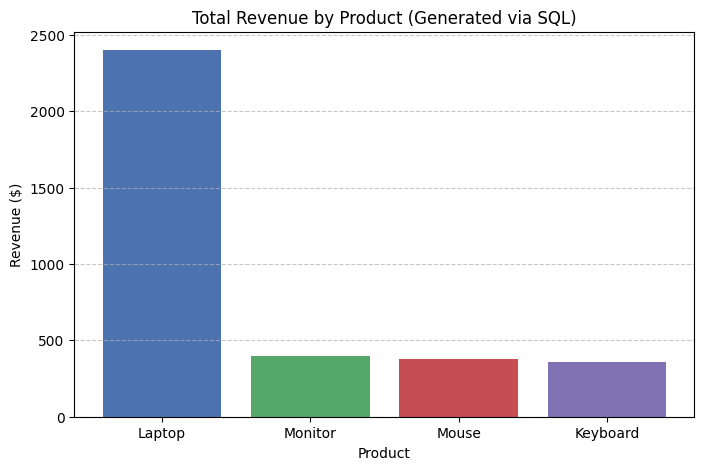


SUCCESS: 'Task7_Query.sql' and 'Task7_Chart.png' are ready to download.


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- PART 1: BUILD THE DATABASE (Data Engineering) ---
# 1. Create a connection to a new file 'sales_data.db'
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# 2. Create a table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# 3. Generate some dummy sales data
# (Product, Quantity Sold, Price per Unit)
data = [
    ('Laptop', 2, 800),
    ('Mouse', 10, 25),
    ('Laptop', 1, 800),
    ('Keyboard', 5, 45),
    ('Mouse', 5, 25),
    ('Monitor', 2, 200),
    ('Keyboard', 3, 45)
]

# 4. Insert data into the database
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', data)
conn.commit()
print("Database 'sales_data.db' created and populated!")

# --- PART 2: ANALYZE THE DATA (Data Analysis) ---
# 5. Run the SQL Query to aggregate sales
query = """
SELECT
    product,
    SUM(quantity) as Total_Quantity,
    SUM(quantity * price) as Total_Revenue
FROM sales
GROUP BY product
ORDER BY Total_Revenue DESC;
"""

# 6. Load results into Pandas
df = pd.read_sql_query(query, conn)

# 7. Display the Data Table
print("\n--- Sales Summary Table ---")
display(df)

# 8. Visualize (Bar Chart)
plt.figure(figsize=(8, 5))
plt.bar(df['product'], df['Total_Revenue'], color=['#4c72b0', '#55a868', '#c44e52', '#8172b3'])
plt.title('Total Revenue by Product (Generated via SQL)')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Task7_Chart.png') # Save for your report
plt.show()

# --- PART 3: EXPORT SQL FILE ---
with open('Task7_Query.sql', 'w') as f:
    f.write(query)
print("\nSUCCESS: 'Task7_Query.sql' and 'Task7_Chart.png' are ready to download.")